<a href="https://colab.research.google.com/github/Rayr07/ML-lab/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Create dataset
data = {
    "Outlook": ["Sunny","Sunny","Overcast","Rain","Rain","Rain","Overcast",
                "Sunny","Sunny","Rain","Sunny","Overcast","Overcast","Rain"],
    "Temp": ["Hot","Hot","Hot","Mild","Cool","Cool","Cool",
             "Mild","Cool","Mild","Mild","Mild","Hot","Mild"],
    "Humidity": ["High","High","High","High","Normal","Normal","Normal",
                 "High","Normal","Normal","Normal","High","Normal","High"],
    "Wind": ["Weak","Strong","Weak","Weak","Weak","Strong","Strong",
             "Weak","Weak","Weak","Strong","Strong","Weak","Strong"],
    "PlayTennis": ["No","No","Yes","Yes","Yes","No","Yes",
                   "No","Yes","Yes","Yes","Yes","Yes","No"]
}

df = pd.DataFrame(data)

In [3]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [4]:
# Features and target
X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]

In [5]:
# Train ID3-like Decision Tree (entropy criterion)
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [6]:
# Predict example
sample = pd.DataFrame({
    "Outlook": [label_encoders["Outlook"].transform(["Sunny"])[0]],
    "Temp": [label_encoders["Temp"].transform(["Cool"])[0]],
    "Humidity": [label_encoders["Humidity"].transform(["High"])[0]],
    "Wind": [label_encoders["Wind"].transform(["Strong"])[0]]
})

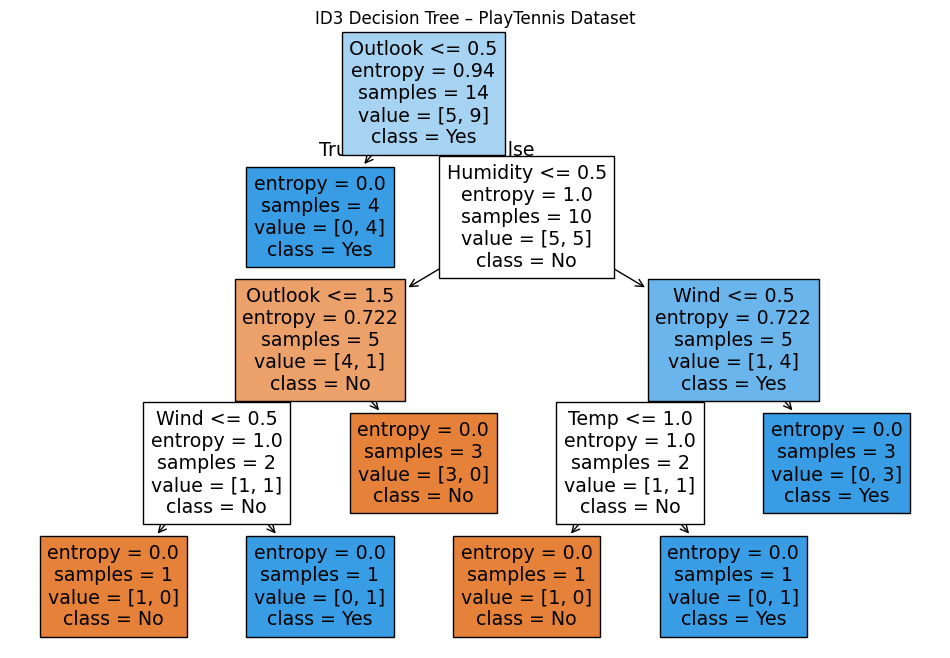

In [7]:
# Plot tree
plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=label_encoders["PlayTennis"].classes_,
          filled=True)
plt.title("ID3 Decision Tree – PlayTennis Dataset")
plt.show()

In [10]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
iris = load_iris(as_frame=True)

data = iris.frame

# Features and target
X = data.drop("target", axis=1)
y = data["target"]

print("Dataset shape:", data.shape)
print(data.head())

# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# ---------------- Naïve Bayes ----------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("=== Naïve Bayes Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# ---------------- Decision Tree ----------------
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    random_state=42
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("=== Decision Tree Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# ---------------- Model Comparison ----------------
print("Model Comparison")
print("----------------")
print(f"Naïve Bayes Accuracy    : {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Decision Tree Accuracy : {accuracy_score(y_test, y_pred_dt):.4f}")

Dataset shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
=== Naïve Bayes Classifier ===
Accuracy: 0.9210526315789473

Confusion Matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg   

Q1

In [11]:
data_df = pd.read_csv('/content/wdbc.data', header=None)
print(data_df.head())
print(data_df.shape)

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [12]:
feature_names = []
with open('/content/wdbc.names', 'r') as f:
    lines = f.readlines()

base_features = [
    "radius", "texture", "perimeter", "area", "smoothness",
    "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"
]

column_names = ["ID", "Diagnosis"]

for feature in base_features:
    column_names.append(f"mean_{feature}")

# Add 'standard error' features
for feature in base_features:
    column_names.append(f"se_{feature}")

# Add 'worst' features
for feature in base_features:
    column_names.append(f"worst_{feature}")

# Assign column names to the DataFrame
data_df.columns = column_names

# Drop the 'ID' column as it is not a feature
data_df = data_df.drop("ID", axis=1)

print("DataFrame with assigned column names and ID dropped:")
print(data_df.head())
print("Shape of the DataFrame:", data_df.shape)


DataFrame with assigned column names and ID dropped:
  Diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  

In [13]:
from sklearn.preprocessing import LabelEncoder

X = data_df.drop('Diagnosis', axis=1)
y = data_df['Diagnosis']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Features (X) head:")
print(X.head())
print("\nEncoded Target variable (y_encoded) head:")
print(y_encoded[:5])
print("\nOriginal Target variable classes:")
print(le.classes_)


Features (X) head:
   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean_compactness  mean_concavity  mean_concave points  mean_symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perime

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (426, 30)
Shape of X_test: (143, 30)
Shape of y_train: (426,)
Shape of y_test: (143,)


In [15]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model using the training data
nb_model.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


In [16]:
y_pred_nb = nb_model.predict(X_test)
print("Predictions made using Gaussian Naive Bayes model.")

Predictions made using Gaussian Naive Bayes model.


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("=== Gaussian Naive Bayes Classifier Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

=== Gaussian Naive Bayes Classifier Evaluation ===
Accuracy: 0.9440559440559441

Confusion Matrix:
 [[90  0]
 [ 8 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        90
           1       1.00      0.85      0.92        53

    accuracy                           0.94       143
   macro avg       0.96      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



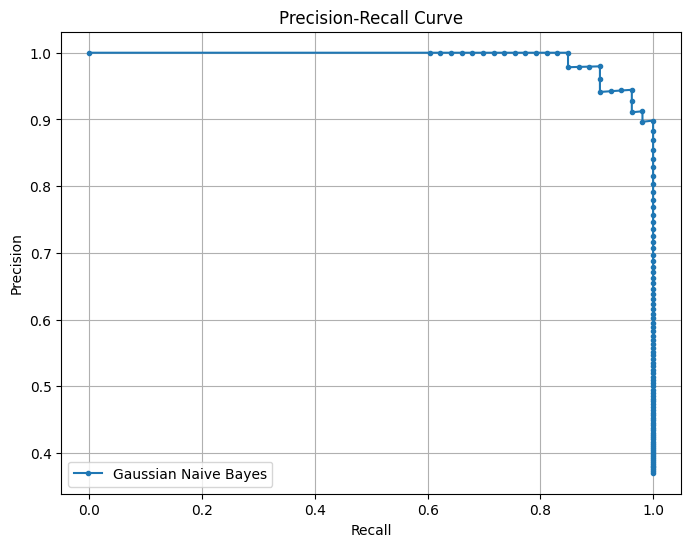

In [18]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probability estimates for the positive class (class 1)
y_scores_nb = nb_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, y_scores_nb)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, marker='.', label='Gaussian Naive Bayes')

# Add title and labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Q2

In [19]:
dt_model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt_model.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


In [20]:
y_pred_dt = dt_model.predict(X_test)
print("Predictions made using Decision Tree model.")

Predictions made using Decision Tree model.


In [21]:
print("=== Decision Tree Classifier Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

=== Decision Tree Classifier Evaluation ===
Accuracy: 0.9440559440559441

Confusion Matrix:
 [[88  2]
 [ 6 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        90
           1       0.96      0.89      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



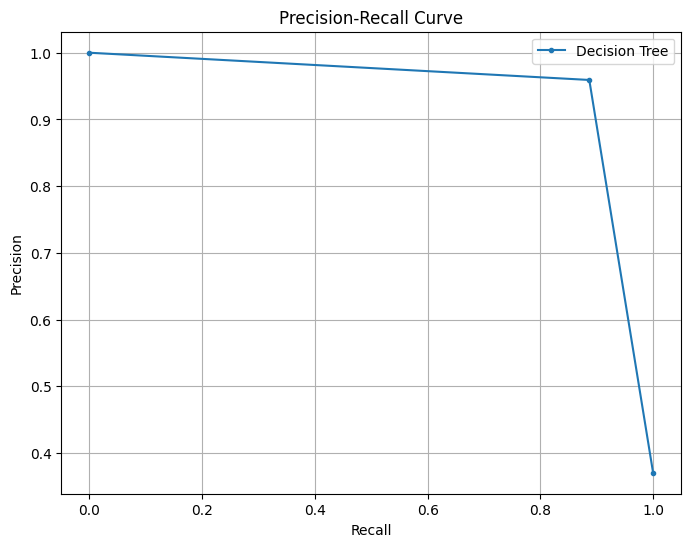

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probability estimates for the positive class (class 1)
y_scores_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_scores_dt)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, marker='.', label='Decision Tree')

# Add title and labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

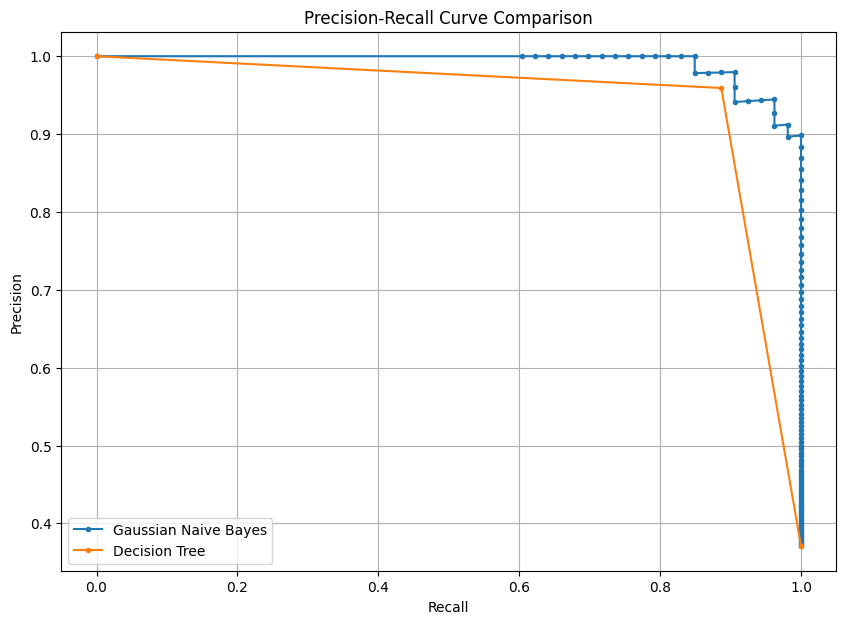

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(recall_nb, precision_nb, marker='.', label='Gaussian Naive Bayes')
plt.plot(recall_dt, precision_dt, marker='.', label='Decision Tree')

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()


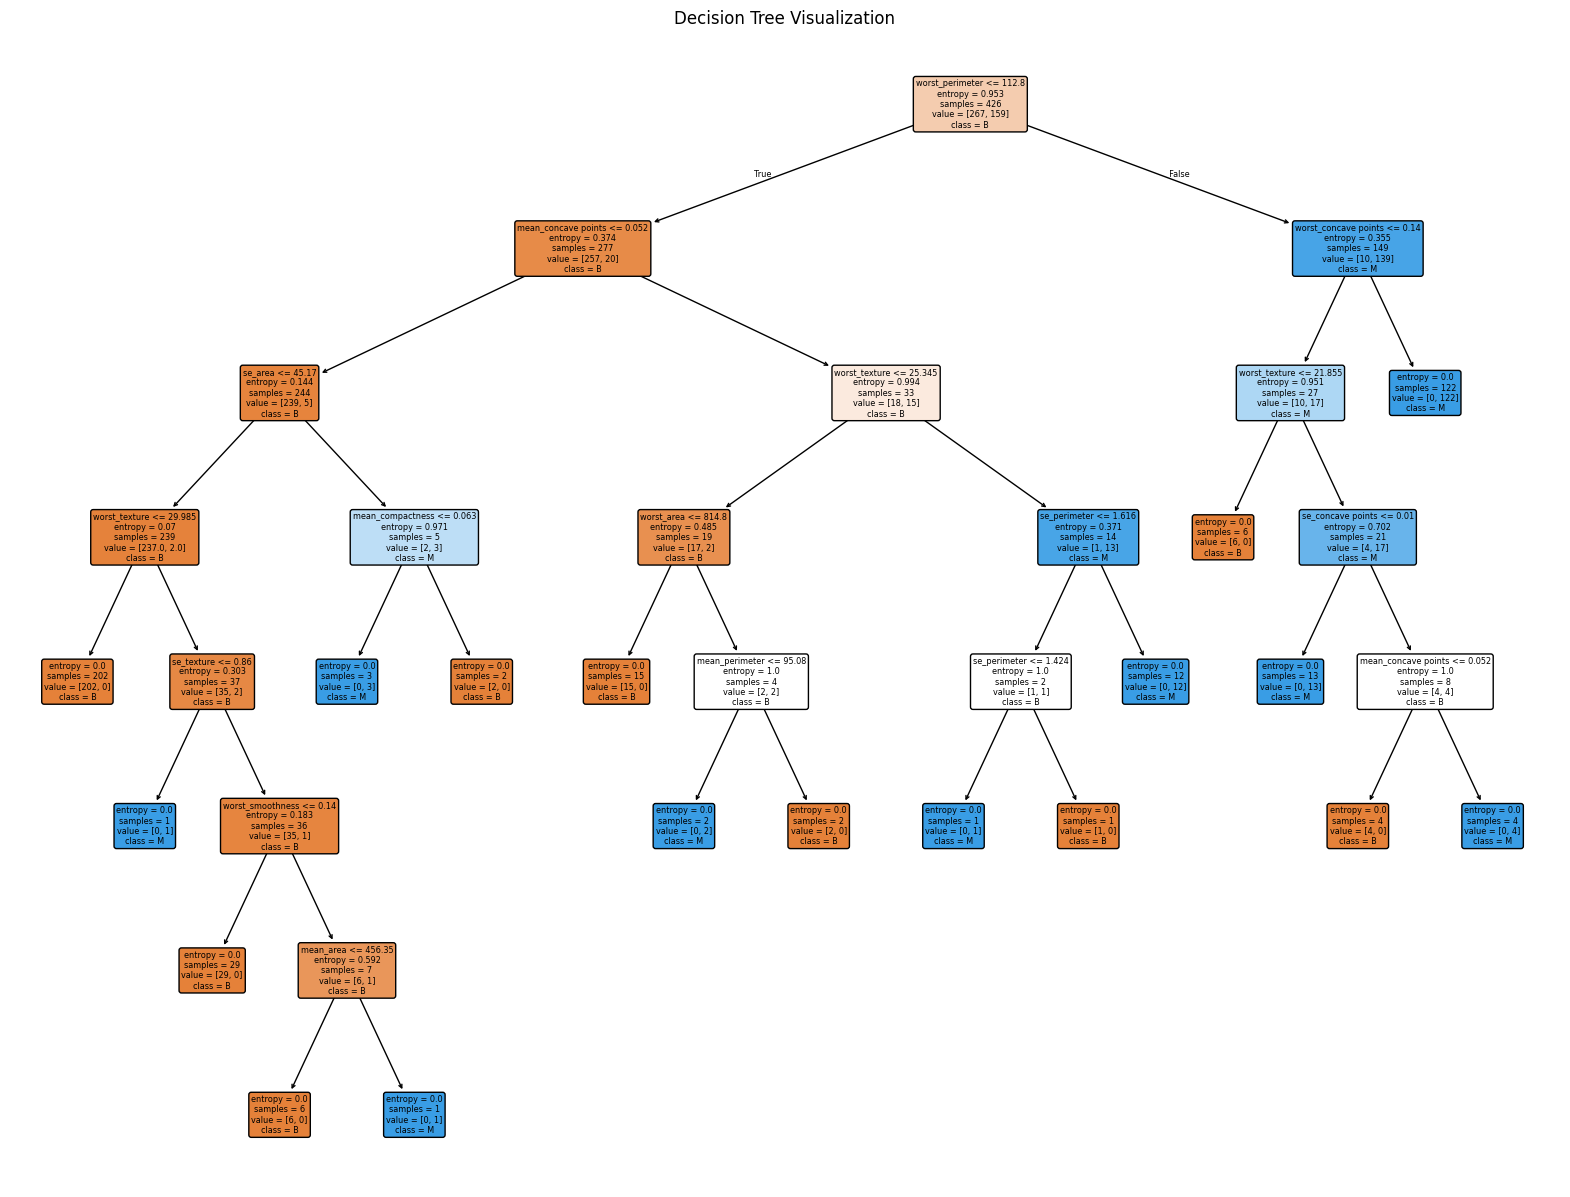

In [24]:
plt.figure(figsize=(20, 15))
plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [25]:
nb_train_accuracy = nb_model.score(X_train, y_train)
dt_train_accuracy = dt_model.score(X_train, y_train)

print(f"Naïve Bayes Training Accuracy: {nb_train_accuracy:.4f}")
print(f"Decision Tree Training Accuracy: {dt_train_accuracy:.4f}")

Naïve Bayes Training Accuracy: 0.9484
Decision Tree Training Accuracy: 1.0000


In [26]:
nb_test_accuracy = nb_model.score(X_test, y_test)
dt_test_accuracy = dt_model.score(X_test, y_test)

print(f"Naïve Bayes Testing Accuracy: {nb_test_accuracy:.4f}")
print(f"Decision Tree Testing Accuracy: {dt_test_accuracy:.4f}")

accuracies_data = {
    'Model': ['Naïve Bayes', 'Naïve Bayes', 'Decision Tree', 'Decision Tree'],
    'Type': ['Train', 'Test', 'Train', 'Test'],
    'Accuracy': [nb_train_accuracy, nb_test_accuracy, dt_train_accuracy, dt_test_accuracy]
}

accuracy_df = pd.DataFrame(accuracies_data)
print("\nAccuracy DataFrame head:")
print(accuracy_df.head())

Naïve Bayes Testing Accuracy: 0.9441
Decision Tree Testing Accuracy: 0.9441

Accuracy DataFrame head:
           Model   Type  Accuracy
0    Naïve Bayes  Train  0.948357
1    Naïve Bayes   Test  0.944056
2  Decision Tree  Train  1.000000
3  Decision Tree   Test  0.944056


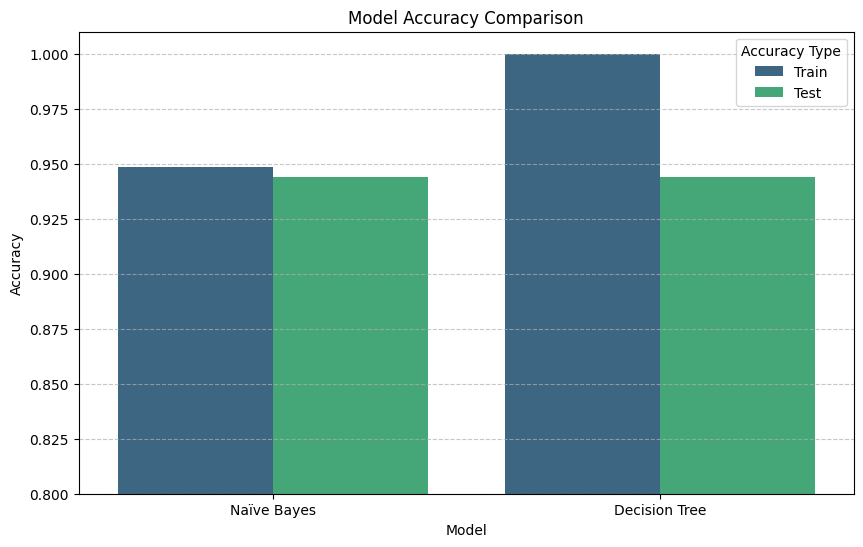

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Type', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.01) # Set y-axis limits for better visualization of accuracies
plt.legend(title='Accuracy Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

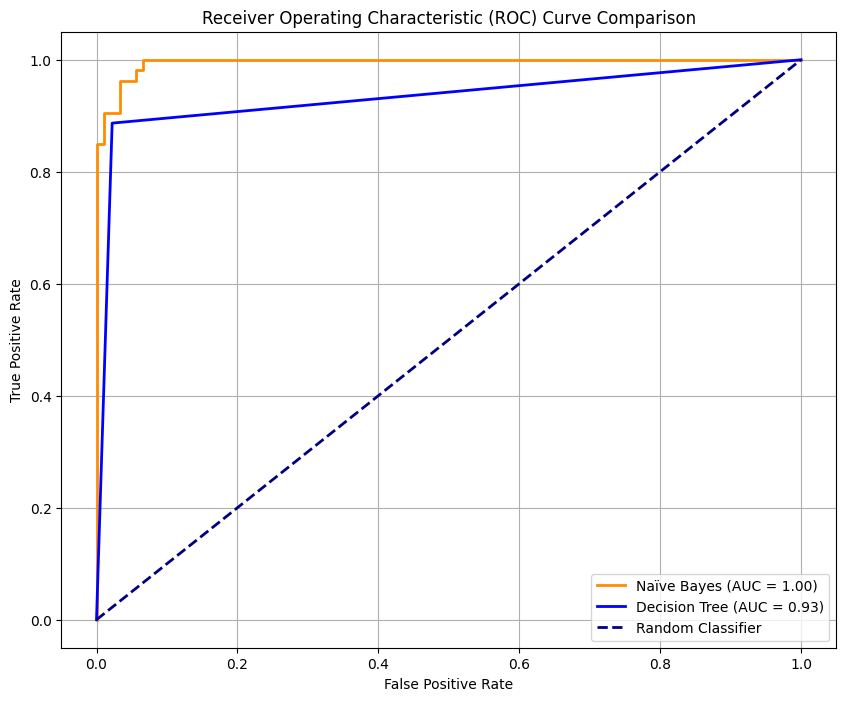

ROC curves for Naïve Bayes and Decision Tree models plotted successfully.


In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability estimates for the positive class (class 1)
y_scores_nb = nb_model.predict_proba(X_test)[:, 1]
y_scores_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and AUC for Naïve Bayes model
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_scores_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Calculate FPR, TPR, and AUC for Decision Tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Create a new figure for the plot
plt.figure(figsize=(10, 8))

# Plot the ROC curve for Naïve Bayes model
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='Naïve Bayes (AUC = %0.2f)' % roc_auc_nb)

# Plot the ROC curve for Decision Tree model
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)

# Add a diagonal dashed line for a random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')

# Display the legend and grid
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("ROC curves for Naïve Bayes and Decision Tree models plotted successfully.")

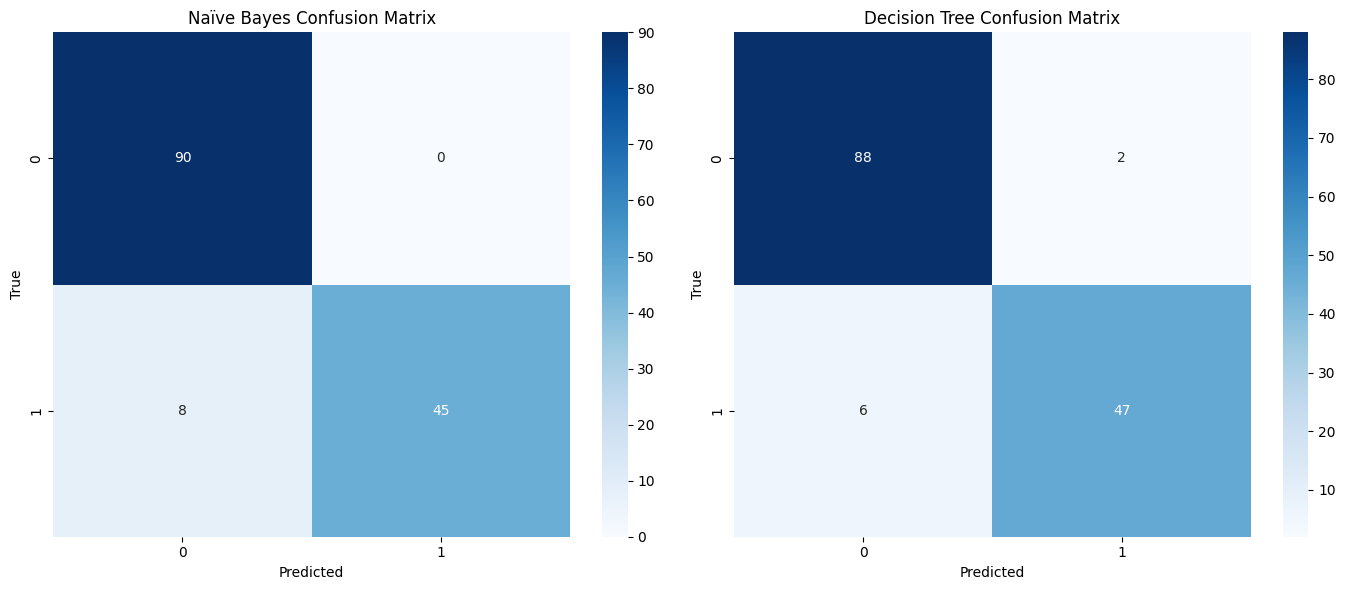

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the Naïve Bayes model
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Calculate the confusion matrix for the Decision Tree model
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Naïve Bayes confusion matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Naïve Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Plot the Decision Tree confusion matrix
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

# Adjust subplot params for a tight layout
plt.tight_layout()

# Display the plots
plt.show()